# Open-Ended Dataset (Covid-19 India)

In [519]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
plt.style.use(['dark_background'])

sns.set(color_codes=True)
import urllib.request
import json

In [520]:
url = "https://api.covid19india.org/states_daily.json"
urllib.request.urlretrieve(url, 'data.json');

In [521]:
with open("data.json") as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [522]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


## Static Composition

### Pie chart

In [523]:
df_pie = df[['status', 'tt']]
df_pie['tt'] = pd.to_numeric(df_pie['tt'])
pie_data = []
for i in df['status'].unique():
    pie_data.append(df_pie[df_pie['status'] == i]['tt'].sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [524]:
pie_data

[1288022, 817485, 30656]

In [525]:
pie_data[0] = pie_data[0] - (pie_data[1] + pie_data[2])
pie_data

[439881, 817485, 30656]

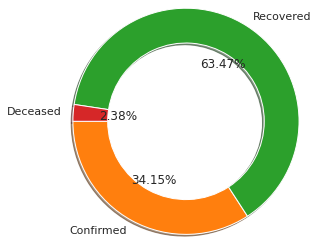

In [526]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([1, 2, 3]))
plt.pie(pie_data, labels = df['status'].unique(), autopct = "%.2f%%",
        radius = 1.3, shadow = True, startangle = 180,
        colors = my_colors, wedgeprops = dict(width = 0.4));

### Bar Plot

In [527]:
df_bar = df.tail(3)
df_bar.set_index('status', inplace = True)
df_bar.drop('date', axis = 1, inplace = True)
df_bar.drop('tt', axis = 1, inplace = True)

df_bar = df_bar.apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [528]:
df_bar = df_bar.T
df_bar.head()

status,Confirmed,Recovered,Deceased
an,19,7,0
ap,7998,5428,61
ar,42,20,0
as,1047,1349,4
br,1625,1083,4


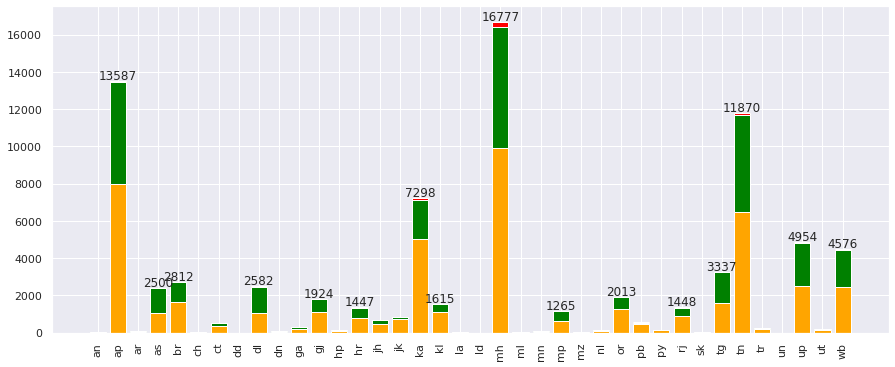

In [529]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.bar(df_bar.index, df_bar.Confirmed, color = 'Orange');
plt.bar(df_bar.index, df_bar.Recovered, bottom = df_bar.Confirmed, color = 'Green');
plt.bar(df_bar.index, df_bar.Deceased, bottom = df_bar.Confirmed + df_bar.Recovered, color = 'Red');

for i, val in enumerate(df_bar.index):
    y = df_bar.loc[val].sum() + 100
    x = i
    if y > 1000:
        plt.text(x, y, str(y), ha = 'center')
plt.xticks(rotation = 90)
plt.show()

## Time-Varying Composition of Data

### Stacked Area Plot

In [530]:
df_area = df.copy(deep = True)
df_area['date'] = pd.to_datetime(df_area['date'])
#df_area.set_index('date', inplace = True)
df_area = df_area[['date','status', 'tt']]
df_area['tt'] = pd.to_numeric(df_area['tt'])

In [531]:
df_area = df_area.pivot(index = 'date', columns = 'status', values = 'tt')
df_area.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,81,2,9
2020-03-15,27,0,4
2020-03-16,15,0,1
2020-03-17,11,1,1
2020-03-18,37,0,0


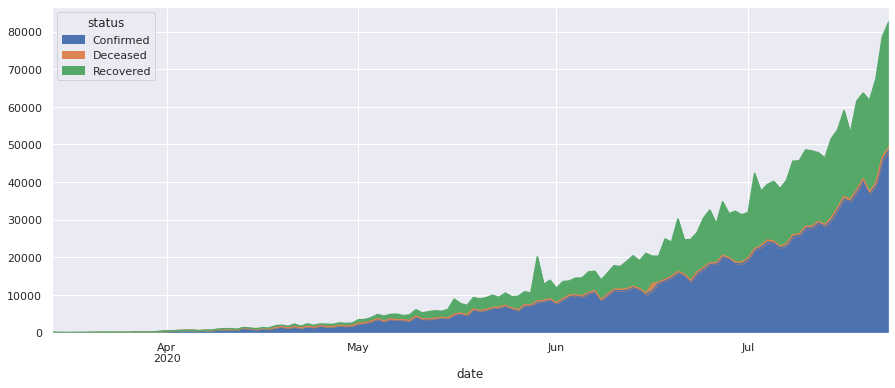

In [532]:
df_area.plot.area(figsize = (15, 6));

### Lineplot

In [533]:
df_area = df.copy(deep = True)
df_area['date'] = pd.to_datetime(df_area['date'])
#df_area.set_index('date', inplace = True)
df_area = df_area[['date','status', 'tt']]
df_area['Cases'] = pd.to_numeric(df_area['tt'])

In [534]:
df_area = df_area.pivot( index = 'date', columns='status', values='Cases')

In [535]:
df_area.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,81,2,9
2020-03-15,27,0,4
2020-03-16,15,0,1
2020-03-17,11,1,1
2020-03-18,37,0,0


In [536]:
cmap = plt.get_cmap('tab10')
my_colors = cmap(np.array([1, 2, 3]))

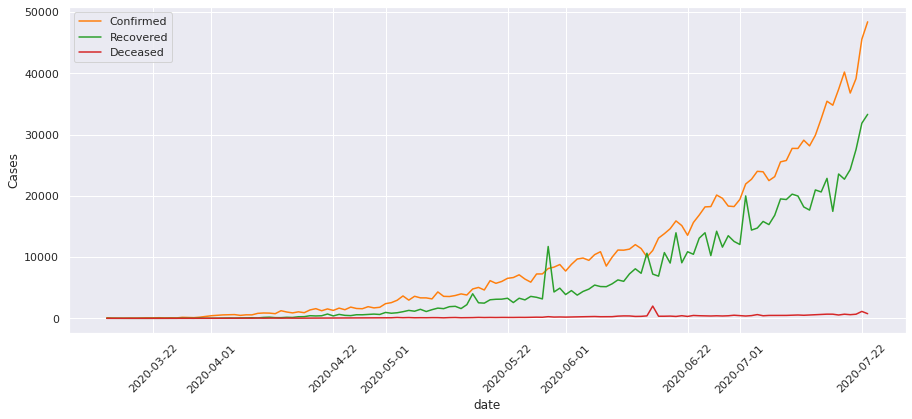

In [537]:
fig = plt.gcf()
fig.set_size_inches(15, 6);
sns.lineplot(df_area.index, 'Confirmed', data = df_area, color = my_colors[0]);
sns.lineplot(df_area.index, 'Recovered', data = df_area, color = my_colors[1]);
sns.lineplot(df_area.index, 'Deceased', data = df_area, color = my_colors[2]);
plt.xticks(rotation = 45);

plt.ylabel('Cases')
plt.legend(labels = ['Confirmed', 'Recovered', 'Deceased']);
plt.show();

### States Confirmed

In [538]:
df_states = df.copy(deep = True)
df_states['date'] = pd.to_datetime(df_states['date'])
#df_states.set_index('date', inplace = True)
df_states.drop('tt', axis = 1, inplace = True)
df_states = df_states[df_states['status'] == 'Confirmed']
df_states.drop('status', axis = 1, inplace = True)

In [539]:
df_states.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,0,12,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0
6,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,2020-03-17,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
12,0,0,0,0,0,0,0,2020-03-18,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,0,2,1,0


In [540]:
df_states = pd.melt(df_states, id_vars = 'date', 
                    value_vars = list(df.columns).remove('date'),
                    var_name = 'state', value_name = 'Confirmed')
df_states['Confirmed'] = pd.to_numeric(df_states['Confirmed'])

In [541]:
df_states.head()

,date,state,Confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


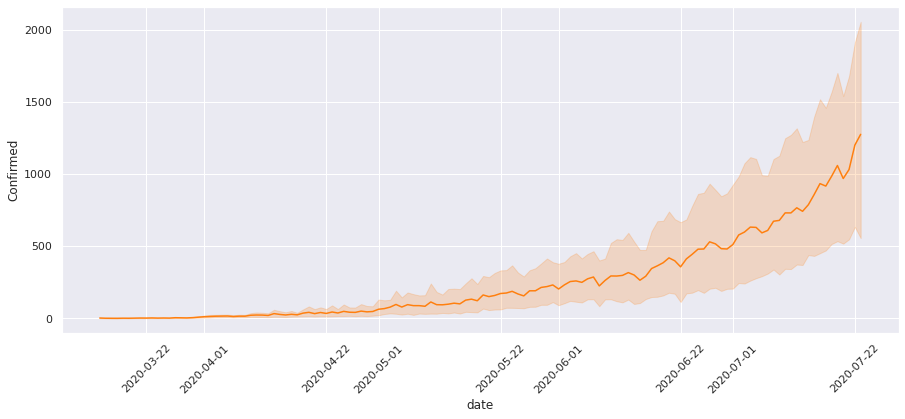

In [542]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('date', 'Confirmed', data = df_states, color = my_colors[0]);
plt.xticks(rotation = 45);

In [543]:
def my_function(v):
    return np.sum(v);

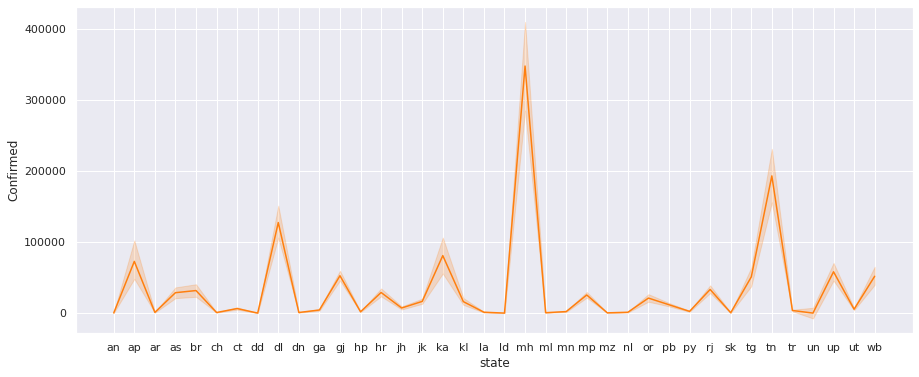

In [544]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('state', 'Confirmed', data = df_states, color = my_colors[0],
             estimator = my_function);

### States ALL Categories

In [545]:
df_ = df.copy(deep = True)
df_['date'] = pd.to_datetime(df_['date'])
df_ = df_[['date', 'status', 'tt']]
df_['Cases'] = pd.to_numeric(df_['tt'])

In [546]:
df_.head()

,date,status,tt,Cases
0,2020-03-14,Confirmed,81,81
1,2020-03-14,Recovered,9,9
2,2020-03-14,Deceased,2,2
3,2020-03-15,Confirmed,27,27
4,2020-03-15,Recovered,4,4


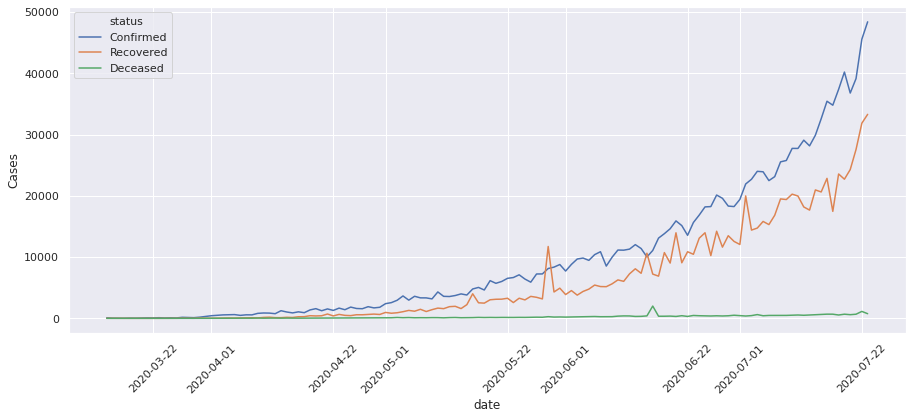

In [547]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('date', 'Cases', data = df_, 
             hue = 'status');
plt.xticks(rotation = 45);

In [548]:
df_states = df.copy(deep = True)
df_states['date'] = pd.to_datetime(df_states['date'])
#df_states.set_index('date', inplace = True)
df_states.drop('tt', axis = 1, inplace = True)

In [549]:
df_C = df_states[df_states['status'] == 'Confirmed'].copy(deep = True)
df_C.drop('status', axis = 1, inplace = True)

In [550]:
df_R = df_states[df_states['status'] == 'Recovered'].copy(deep = True)
df_R.drop('status', axis = 1, inplace = True)

In [551]:
df_D = df_states[df_states['status'] == 'Deceased'].copy(deep = True)
df_D.drop('status', axis = 1, inplace = True)

In [552]:
df_MC = pd.melt(df_C, id_vars = 'date', value_vars = list(df_C.columns).remove('date'),
                var_name = 'state', value_name = 'Confirmed')

In [553]:
df_MR = pd.melt(df_R, id_vars = 'date', value_vars = list(df_R.columns).remove('date'),
                var_name = 'state', value_name = 'Recovered')

In [554]:
df_MD = pd.melt(df_D, id_vars = 'date', value_vars = list(df_D.columns).remove('date'),
                var_name = 'state', value_name = 'Deceased')

In [555]:
df_MC['Confirmed'] = pd.to_numeric(df_MC['Confirmed'])
df_MC['Recovered'] = pd.to_numeric(df_MR['Recovered'])
df_MC['Deceased'] = pd.to_numeric(df_MD['Deceased'])

In [556]:
df_MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5016 non-null   datetime64[ns]
 1   state      5016 non-null   object        
 2   Confirmed  5016 non-null   int64         
 3   Recovered  5016 non-null   int64         
 4   Deceased   5016 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 196.1+ KB


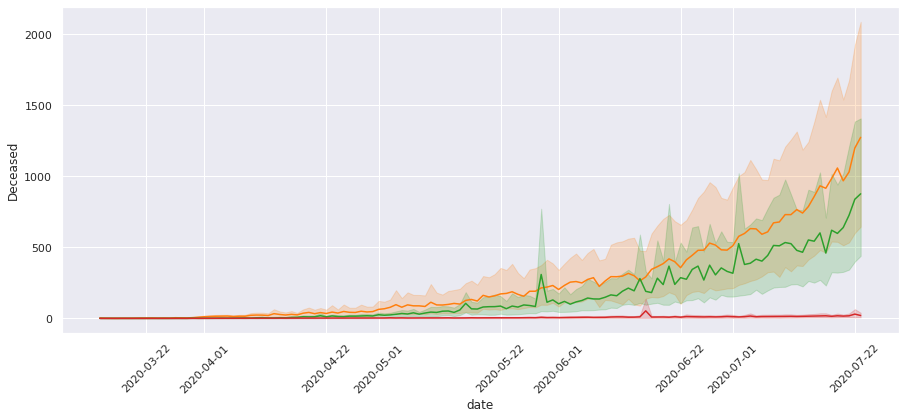

In [557]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('date', 'Confirmed', data = df_MC, color = my_colors[0]);
sns.lineplot('date', 'Recovered', data = df_MC, color = my_colors[1]);
sns.lineplot('date', 'Deceased', data = df_MC, color = my_colors[2]);
plt.xticks(rotation = 45);

In [558]:
def my_function(v):
    return np.sum(v);

In [560]:
df_MC.head()

,date,state,Confirmed,Recovered,Deceased
0,2020-03-14,an,0,0,0
1,2020-03-15,an,0,0,0
2,2020-03-16,an,0,0,0
3,2020-03-17,an,0,0,0
4,2020-03-18,an,0,0,0


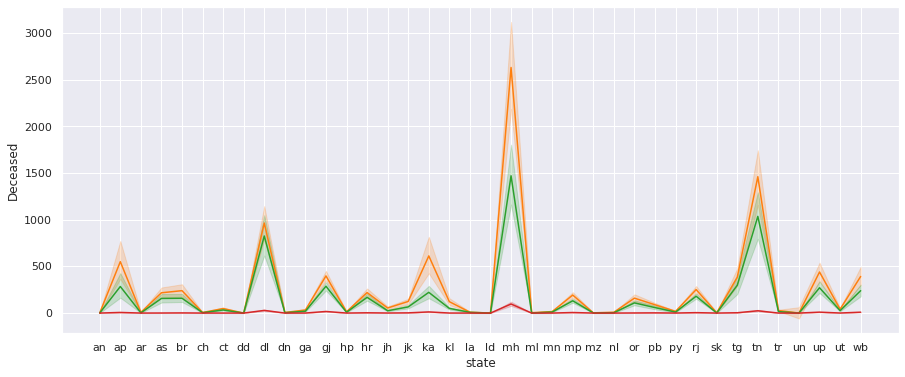

In [563]:
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.lineplot('state', 'Confirmed', data = df_MC, color = my_colors[0]);
sns.lineplot('state', 'Recovered', data = df_MC, color = my_colors[1]);
sns.lineplot('state', 'Deceased', data = df_MC, color = my_colors[2]);